# Classifying Emotions in Texts using Scikit-learn

In [2]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [3]:
# Load Data Viz Pkgs
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load Text Cleaning Pkgs
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

In [23]:
# Load ML Pkgs
# feature extraction / vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek

# classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Evaluation Metrics
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

# Import Data

In [6]:
# Load Dataset
df = pd.read_csv("data/emotion_dataset_raw.csv")

In [7]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [8]:
# Value Counts 
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [9]:
class_names = df['Emotion'].unique()
print(class_names)

['neutral' 'joy' 'sadness' 'fear' 'surprise' 'anger' 'shame' 'disgust']


<AxesSubplot:xlabel='Emotion', ylabel='count'>

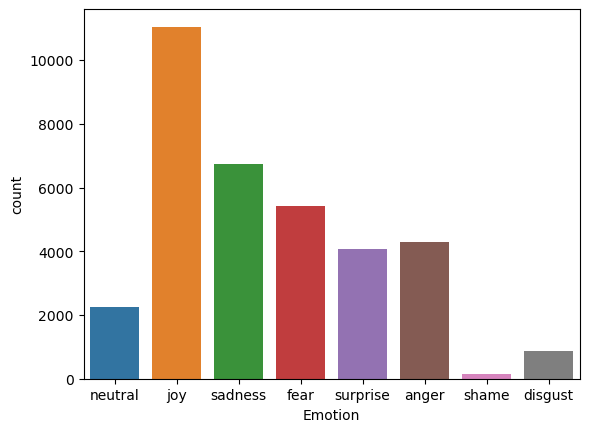

In [10]:
# Visualize 
sns.countplot(x='Emotion', data=df)

# Data Cleaning

In [11]:
def preprocess_and_tokenize(data):    

    #remove html markup
    data = re.sub("(<.*?>)", "", data)

    #remove urls
    data = re.sub(r'http\S+', '', data)
    
    #remove hashtags and @names
    data= re.sub(r"(#[\d\w\.]+)", '', data)
    data= re.sub(r"(@[\d\w\.]+)", '', data)

    #remove punctuation and non-ascii digits
    data = re.sub("(\\W|\\d)", " ", data)
    
    #remove whitespace
    data = data.strip()
    
    # tokenization with nltk
    data = word_tokenize(data)
    
    # stemming with nltk
    porter = PorterStemmer()
    stem_data = [porter.stem(word) for word in data]
        
    return stem_data

# Feature Engineering

In [12]:
# Define Features & Labels
X = df['Text']
y = df['Emotion']

# Split Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

print('size of training set: %s' % (len(X_train)))
print('size of validation set: %s' % (len(X_test)))
print(df.Emotion.value_counts())

df.head()

size of training set: 24354
size of validation set: 10438
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64


,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [13]:
# Vectorizing text using Term Frequency technique (Term Frequency(TF) — Inverse Dense Frequency(IDF))
# TFIDF, unigrams and bigrams
vect = TfidfVectorizer(tokenizer=preprocess_and_tokenize, sublinear_tf=True, norm='l2', ngram_range=(1, 2))

# fit on our complete corpus
vect.fit_transform(df.Text)

# transform testing and training datasets to vectors
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

# Model Building

## 1. Naive Bayes

In [14]:
nb = MultinomialNB()

# Train and Fit the Data
nb.fit(X_train_vect, y_train)

ynb_pred = nb.predict(X_test_vect)

In [15]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Accuracy: 44.92%

F1 Score: 44.92

COnfusion Matrix:
 [[ 138    0    1 1107    0   37    0    0]
 [   0    0    1  286    0    5    0    0]
 [   1    0  455 1148    0   35    0    6]
 [   0    0    6 3284    1    9    0   11]
 [   0    0    0  546   96   33    0    0]
 [   0    0    2 1472    0  538    0    3]
 [   0    0    0   36    0    0    0    0]
 [   0    0   19  977    0    7    0  178]]


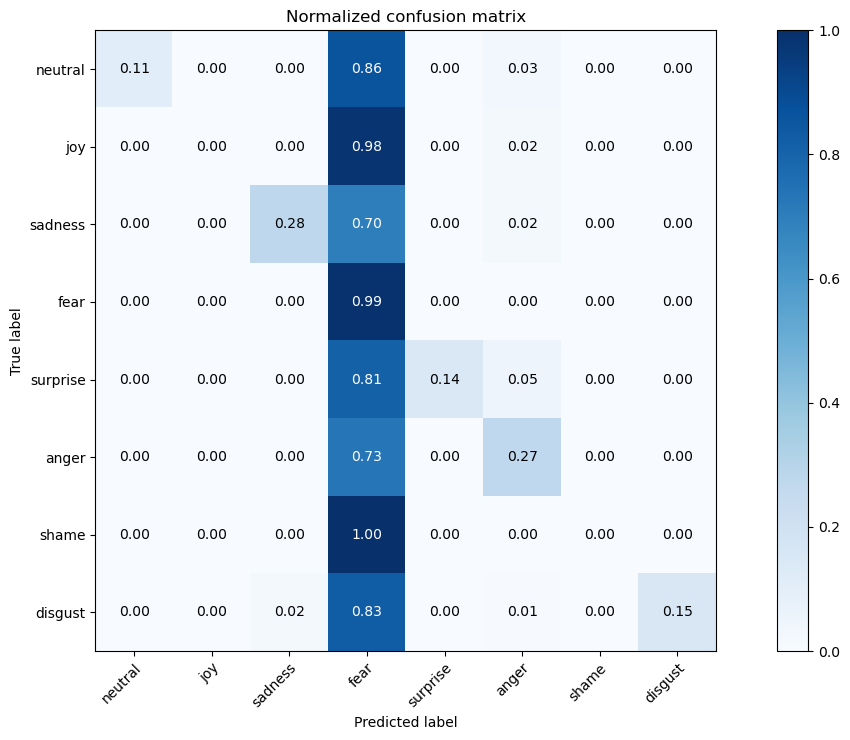

In [16]:
# Evaluate the Performance
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ynb_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ynb_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ynb_pred))

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, ynb_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

## Random Forest

Accuracy: 59.05%

F1 Score: 59.05

COnfusion Matrix:
 [[ 514    0   23  555   36  149    1    5]
 [  14   13    1  226    5   29    1    3]
 [  31    0  933  538   32   83    0   28]
 [  13    0   28 3046   82  116    0   26]
 [  10    0    6  149  463   47    0    0]
 [  47    0   26  984   33  914    1   10]
 [   1    0    0   12    0    2   21    0]
 [  17    0   22  774   25   82    1  260]]


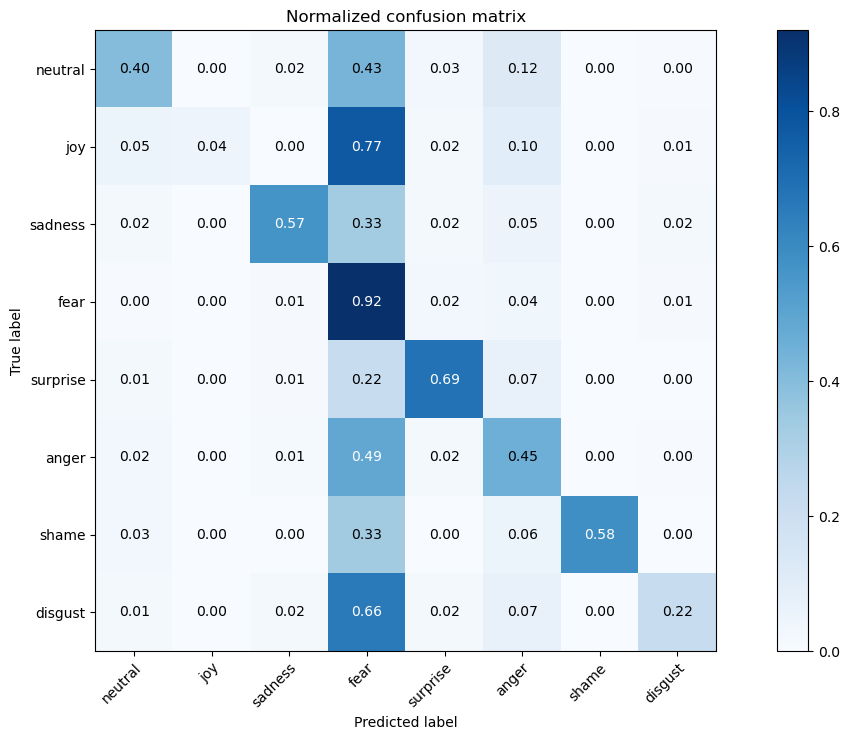

In [17]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train_vect, y_train)

yrf_pred = rf.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yrf_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yrf_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, yrf_pred))

plot_confusion_matrix(y_test, yrf_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()


## Logistic Regression

/Users/jaehyungshin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 62.65%

F1 Score: 62.65

COnfusion Matrix:
 [[ 657    0   44  336   18  205    0   23]
 [  29    2   27  151    2   69    0   12]
 [  66    0 1015  400    8  118    0   38]
 [  44    0   68 2934   43  175    0   47]
 [  23    0   15  200  343   84    0   10]
 [  79    0   52  650   10 1185    0   39]
 [   5    0    3   19    0    8    1    0]
 [  39    0   43  580    1  116    0  402]]


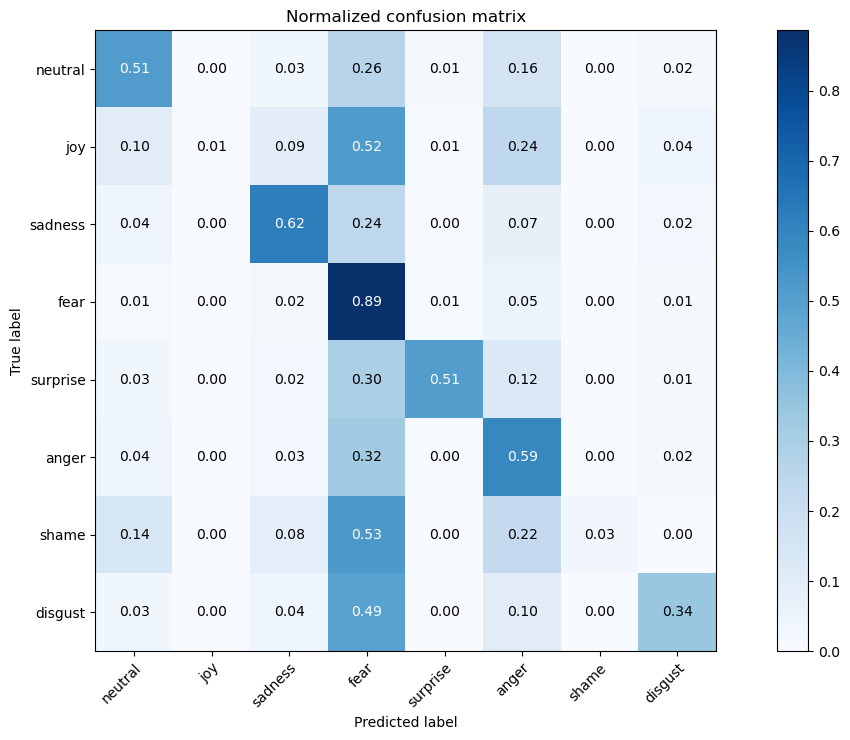

In [18]:
log = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
log.fit(X_train_vect, y_train)

ylog_pred = log.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ylog_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ylog_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ylog_pred))

plot_confusion_matrix(y_test, ylog_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

## Linear Support Vector Machine

Accuracy: 64.62%

F1 Score: 64.62

COnfusion Matrix:
 [[ 725    1   46  262   24  200    1   24]
 [  37   16   18  128    3   73    1   16]
 [  84    1 1068  320    6  124    0   42]
 [  61    1   76 2843   50  210    1   69]
 [  26    0   15  177  367   78    0   12]
 [ 119    0   61  541   16 1237    1   40]
 [   3    0    1    9    0    1   22    0]
 [  49    0   39  506    6  113    1  467]]


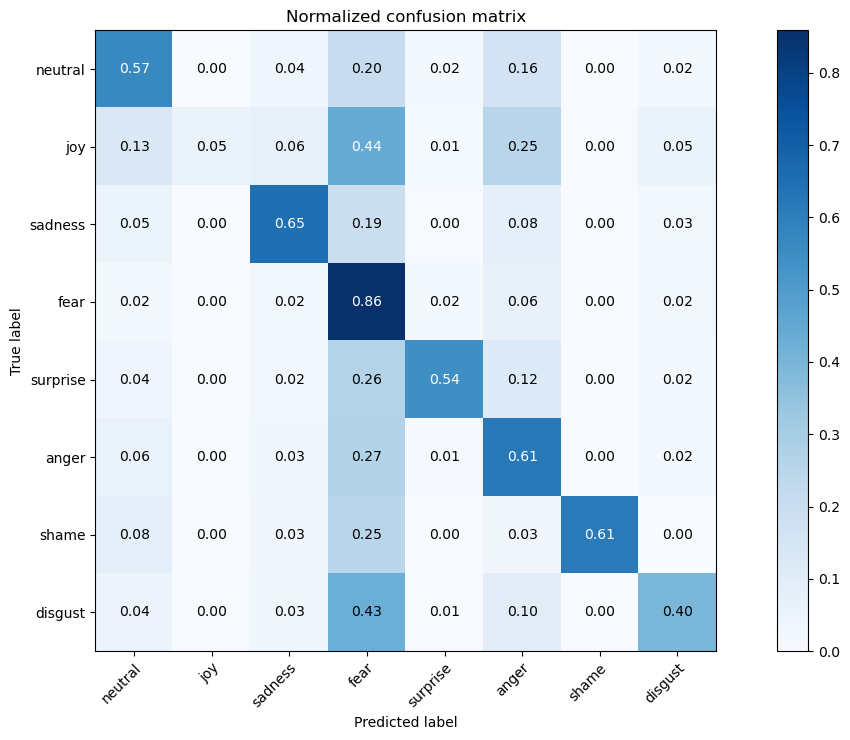

In [24]:
clf=sklearn.svm.SVC(kernel='linear',probability=True)
clf.fit(X_train_vect, y_train)

ysvm_pred = clf.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ysvm_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ysvm_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ysvm_pred))

plot_confusion_matrix(y_test, ysvm_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

## Selecting the Model with the highest Accuracy

In [26]:
#Create pipeline with our tf-idf vectorizer and LinearSVC model
svm_model = Pipeline([
    ('tfidf', vect),
    ('clf', clf),
])

In [27]:
# Check for Acucracy
svm_model.score(X_train, y_train)

0.9437053461443705

In [32]:
# Make A Sample Prediction
ex1 = "Gosh today was so tiring"

svm_model.predict([ex1])

array(['sadness'], dtype=object)

In [30]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifer_CLF.pkl", "wb")
joblib.dump(svm_model, pipeline_file)
pipeline_file.close()

In [11]:
!pipreqs .

INFO: Successfully saved requirements file in ./requirements.txt
